### Fetch the data

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv("iris.csv")

In [30]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data cleaning

In [31]:
df.shape

(150, 6)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Data Analysis

In [33]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Identify the input and output

In [34]:
y = df.Species
x = df.drop(columns=["Species","Id"])

In [35]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [36]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Choose the algorithm

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()

### Train the model

In [39]:
model.fit(x,y)

LogisticRegression()

### Check the accuracy

In [40]:
model.score(x,y)

0.9733333333333334

### Predict using the trained model

In [41]:
x.iloc[4]

SepalLengthCm    5.0
SepalWidthCm     3.6
PetalLengthCm    1.4
PetalWidthCm     0.2
Name: 4, dtype: float64

In [42]:
model.predict([x.iloc[4]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

### Classify

In [43]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr

In [44]:
original = df.Species
predicted = model.predict(x)

In [45]:
cm(original,predicted)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

In [46]:
from  srtools import print_confusion_matrix

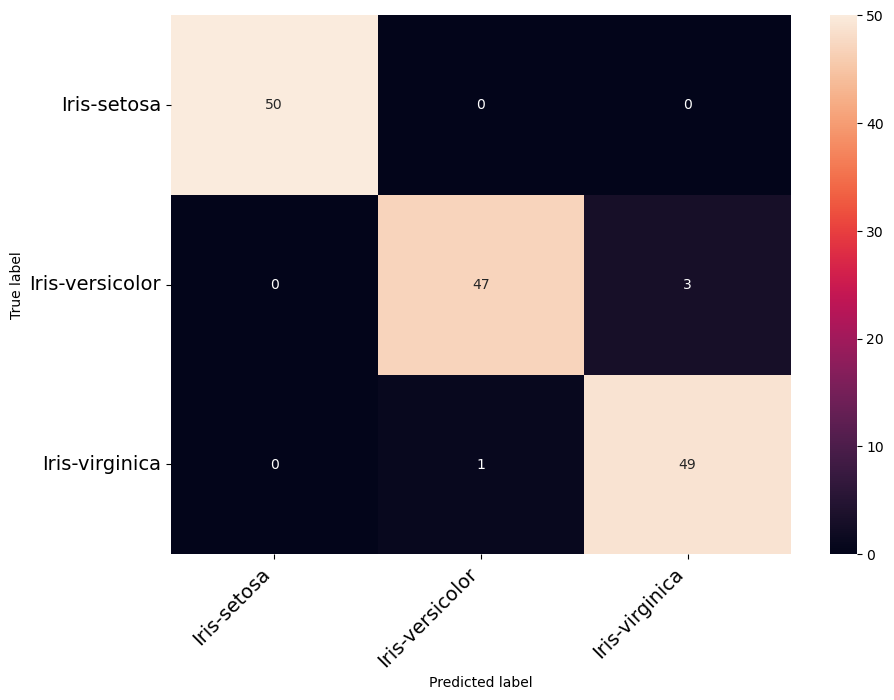

In [47]:
mycm = print_confusion_matrix(cm(original,predicted),model.classes_)

In [48]:
print(cr(original,predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.94      0.96        50
 Iris-virginica       0.94      0.98      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



In [49]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [50]:
precision_score(original,predicted, average='weighted')

0.9738247863247864

In [51]:
recall_score(original,predicted, average='weighted')

0.9733333333333334

In [52]:
f1_score(original,predicted, average='weighted')

0.9733226623982927